In [1]:
import pandas as pd
import json
from typing import Union

"""Calculate the Average True Range (ATR) of a stock."""
def calculate_atr(df: pd.DataFrame, period: int = 14) -> pd.Series:
    
    df['High-Low'] = df['High'] - df['Low']
    df['High-PrevClose'] = abs(df['High'] - df['Close'].shift())
    df['PrevClose-Low'] = abs(df['Close'].shift() - df['Low'])
    df['TR'] = df[['High-Low', 'High-PrevClose', 'PrevClose-Low']].max(axis=1)
    atr = df['TR'].rolling(window=period).mean()
    return atr

def count_stocks_within_atr(data: dict, date: Union[str, pd.Timestamp], atr_multiplier: float = 2) -> int:
    count = 0
    if isinstance(date, str):
        date = pd.to_datetime(date)
    for stock in data.keys():
        if all(item in data[stock].columns for item in ['Close', 'ATR', '10-day High']) and date in data[stock].index:
            close_price = data[stock].loc[date, 'Close']
            high_price = data[stock].loc[date, '10-day High']
            atr = data[stock].loc[date, 'ATR']
            if close_price >= high_price - atr_multiplier * atr:
                count += 1
    return count

# Load data
with open("data.json") as f:
    data = json.load(f)

# Convert data to DataFrames and calculate ATR and 10-day high
for stock in data.keys():
    data[stock] = pd.DataFrame(data[stock])
    if 'Date' in data[stock].columns:
        data[stock]['Date'] = pd.to_datetime(data[stock]['Date'])
        data[stock].set_index('Date', inplace=True)
    if all(item in data[stock].columns for item in ['High', 'Low', 'Close']):
        data[stock]['ATR'] = calculate_atr(data[stock])
        data[stock]['10-day High'] = data[stock]['High'].rolling(window='63D').max()




In [26]:
#Extract the first column in data["AAPL"]
tst = data["AAPL"].iloc[:,0]

#get the keys in tst
tst.keys()


DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-04-27', '2023-04-28', '2023-05-01', '2023-05-02',
               '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-08',
               '2023-05-09', '2023-05-10'],
              dtype='datetime64[ns]', name='Date', length=592, freq=None)

In [29]:
import matplotlib.pyplot as plt

# Calculate the number of stocks within 2 ATR of their 10-day high for each date
dates = pd.date_range(start='2021-01-01', end='2023-05-11')
counts = {date: count_stocks_within_atr(data, date) for date in tst.keys()}

# Convert the counts dictionary to a pandas Series for easier plotting
counts_series = pd.Series(counts, name="Count")



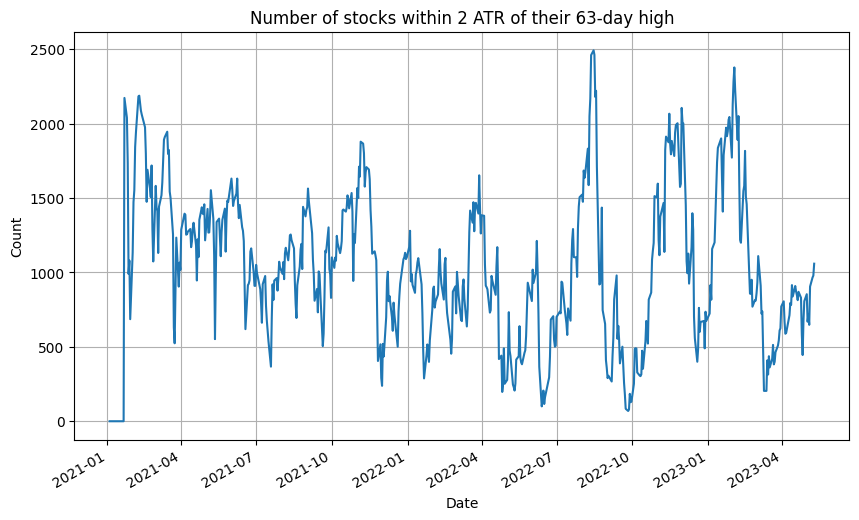

In [30]:
# Plot the data
plt.figure(figsize=(10, 6))
counts_series.plot()
plt.title("Number of stocks within 2 ATR of their 63-day high")
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(True)
plt.show()